# Motion Clouds utilities

Here, we test some of the utilities that are delivered with  the MotionClouds package.


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import MotionClouds as mc

In [3]:
mc.N_X, mc.N_Y, mc.N_frame = 30, 40, 50
fx, fy, ft = mc.get_grids(mc.N_X, mc.N_Y, mc.N_frame)

## generating figures

As they are visual stimuli, the main outcome of the scripts are figures. Utilities allow to plot all figures, usually marked by a name:

In [4]:
name = 'testing_utilities'

In [5]:
help(mc.figures_MC)

Help on function figures_MC in module MotionClouds:

figures_MC(fx, fy, ft, name, V_X=1.0, V_Y=0.0, do_figs=True, do_movie=True, B_V=0.5, sf_0=0.125, B_sf=0.1, loggabor=True, recompute=False, theta=0.0, B_theta=0.19634954084936207, alpha=0.0, vext='.mp4', seed=None, impulse=False, do_amp=False, verbose=False, figpath='../files/', return_envelope=False, **kwargs)
    Generates the figures corresponding to the Fourier spectra and the stimulus cubes and
    movies directly from the parameters.
    
    The figures names are automatically generated.



In [6]:
mc.figures_MC(fx, fy, ft, name, recompute=True)

In [7]:
help(mc.in_show_video)

Help on function in_show_video in module MotionClouds:

in_show_video(name, vext='.mp4', loop=True, autoplay=True, controls=True, embed=False, figpath='../files/', **kwargs)
    Columns represent isometric projections of a cube. The left column displays
    iso-surfaces of the spectral envelope by displaying enclosing volumes at 5
    different energy values with respect to the peak amplitude of the Fourier spectrum.
    The middle column shows an isometric view of the faces of the movie cube.
    The first frame of the movie lies on the x-y plane, the x-t plane lies on the
    top face and motion direction is seen as diagonal lines on this face (vertical
    motion is similarly see in the y-t face). The third column displays the actual
    movie as an animation.
    
    Given a name, displays the figures corresponding to the Fourier spectra, the
    stimulus cubes and movies within the notebook.



In [8]:
mc.in_show_video(name)

This function embeds the images and video *within* the notebook. Sometimes you want to avoid that:

In [9]:
mc.in_show_video(name, embed=False)

Sometimes, you may have already computed some envelope or just want to distort it, then you can use ``mc.figures``:

In [10]:
env = mc.envelope_gabor(fx, fy, ft)

In [11]:
help(mc.figures)

Help on function figures in module MotionClouds:

figures(z=None, name='MC', vext='.mp4', do_movie=True, do_figs=True, recompute=False, seed=None, impulse=False, verbose=False, masking=False, do_amp=False, figpath='../files/', **kwargs)
    Given an envelope, generates the figures corresponding to the Fourier spectra
    and the stimulus cubes and movies.
    
    The figures names are automatically generated.



In [12]:
import numpy as np
mc.figures(np.sqrt(env), name + '_0')

In [13]:
mc.in_show_video(name + '_0')

## low-level figures : 3D visualizations

In [14]:
help(mc.cube)

Help on function cube in module MotionClouds:

cube(im_in, azimuth=30.0, elevation=45.0, name=None, ext='.png', do_axis=True, show_label=True, cube_label={'x': 'x', 'y': 'y', 't': 't'}, colormap='gray', roll=-180.0, vmin=0.0, vmax=1.0, figsize=(800, 800), figpath='../files/', **kwargs)
    Visualization of the stimulus as a cube



In [15]:
help (mc.visualize)

Help on function visualize in module MotionClouds:

visualize(z_in, azimuth=25.0, elevation=30.0, thresholds=[0.94, 0.89, 0.75, 0.5, 0.25, 0.1], opacities=[0.9, 0.8, 0.7, 0.5, 0.2, 0.1], fourier_label={'f_x': 'f_x', 'f_y': 'f_y', 'f_t': 'f_t'}, name=None, ext='.png', do_axis=True, do_grids=False, draw_projections=True, colorbar=False, f_N=2.0, f_tN=2.0, figsize=(800, 800), figpath='../files/', **kwargs)
    Visualization of the Fourier spectrum by showing 3D contour plots at different thresholds
    
    parameters
    ----------
    z : envelope of the cloud



## Handling filenames

By default, the folder for generating figures or data is ``mc.figpath``:

In [16]:
print(mc.figpath)

../files/


To generate figures, we assign  file names, such as:

In [17]:
filename = os.path.join(mc.figpath, name)

It is then possible to check if that figures exist:

In [18]:
print('filename=', filename, ', exists? : ', mc.check_if_anim_exist(filename))

filename= ../files/testing_utilities , exists? :  False


Note that the file won't be recomputed if it exists:

In [19]:
mc.figures(env, name)

This behavior can be overriden using the recompute option

In [20]:
mc.figures(env, name, recompute=True)

Warning: be sure that when you display a given file, it corresponds to the parameters you have set for your stimulus.

## low-level figures : exporting to various formats

It is possible to export motion clouds to many different formats. Here are some examples:

In [21]:
!rm -fr ../files/export

In [22]:
name = 'export'
fx, fy, ft = mc.get_grids(mc.N_X, mc.N_Y, mc.N_frame)
z = mc.rectif(mc.random_cloud(mc.envelope_gabor(fx, fy, ft)))
mc.PROGRESS = False
for vext in mc.SUPPORTED_FORMATS:
    print ('Exporting to format: ', vext)
    mc.anim_save(z, os.path.join(mc.figpath, name), display=False, vext=vext, verbose=False)

Exporting to format:  .h5
Exporting to format:  .mpg
Exporting to format:  .mp4
Exporting to format:  .gif
Exporting to format:  .webm
Exporting to format:  .zip
Exporting to format:  .mat
Exporting to format:  .png


## showing a video

To show a video in a notebook, issue:

In [23]:
mc.notebook = True # True by default
mc.in_show_video('export')

""


## Rectifying the contrast

The ``mc.rectif`` function allows to rectify the amplitude of luminance values within the whole generated texture between $0$ and $1$:

In [24]:
fx, fy, ft = mc.get_grids(mc.N_X, mc.N_Y, mc.N_frame)
envelope = mc.envelope_gabor(fx, fy, ft)
image = mc.random_cloud(envelope)
print('Min :', image.min(), ', mean: ', image.mean(), ', max: ', image.max())

Min : -2.21666797481 , mean:  -1.70234197109e-19 , max:  2.09408478901


In [25]:
image = mc.rectif(image)
print('Min :', image.min(), ', mean: ', image.mean(), ', max: ', image.max())

Min : 0.0 , mean:  0.5 , max:  0.972349673655


In [26]:
import pylab
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline
#%config InlineBackend.figure_format='retina' # high-def PNGs, quite bad when using file versioning
%config InlineBackend.figure_format='svg'

Before Rectification of the frames
Mean= 1.06581410364e-18 , std= 0.84527878442 , Min= -3.07067785094 , Max= 3.47591337022  Abs(Max)= 3.47591337022
After Rectification of the frames
Mean= 0.5 , std= 0.0303977219219 , Min= 0.389572986872 , Max= 0.625
percentage pixels clipped= 0.0
Before Rectification of the frames
Mean= -1.18423789293e-19 , std= 0.817871986507 , Min= -3.42450006883 , Max= 3.40014935729  Abs(Max)= 3.42450006883
After Rectification of the frames
Mean= 0.5 , std= 0.125 , Min= -0.0233857078689 , Max= 1.01966405094
percentage pixels clipped= 0.005


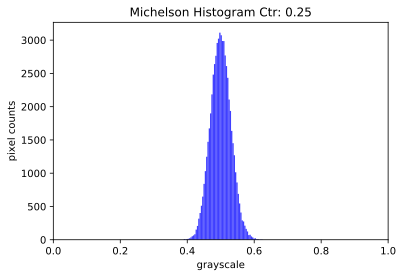

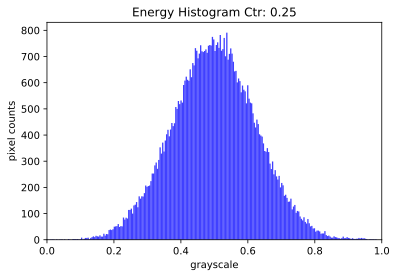

In [27]:
name = 'contrast_methods-'
#initialize
fx, fy, ft = mc.get_grids(mc.N_X, mc.N_Y, mc.N_frame)
ext = '.zip'
contrast = 0.25
B_sf = 0.3

for method in ['Michelson', 'Energy']:
    z = mc.envelope_gabor(fx, fy, ft, B_sf=B_sf)
    im = np.ravel(mc.random_cloud(z, seed =1234))
    im_norm = mc.rectif(mc.random_cloud(z), contrast, method=method, verbose=True)
    plt.figure()
    plt.subplot(111)
    plt.title(method + ' Histogram Ctr: ' + str(contrast))
    plt.ylabel('pixel counts')
    plt.xlabel('grayscale')
    bins = int((np.max(im_norm[:])-np.min(im_norm[:])) * 256)
    plt.xlim([0, 1])
    plt.hist(np.ravel(im_norm), bins=bins, normed=False, facecolor='blue', alpha=0.75)
    #plt.savefig(name_)

def image_entropy(img):
    """calculate the entropy of an image"""
    histogram = img.histogram()
    histogram_length = np.sum(histogram)
    samples_probability = [float(h) / histogram_length for h in histogram]
    return -np.sum([p * math.log(p, 2) for p in samples_probability if p != 0])

If we normalise the histogram then the entropy base on gray levels is going to be the almost the same.
<br> TODO: Review the idea of entropy between narrowband and broadband stimuli.